In [1]:
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from Data_functions import getData

In [2]:
points, faces = getData('../data/obj/')
print(faces)

             x        y        z
0          1.0     67.0      2.0
1          1.0     66.0     67.0
2         66.0    132.0     67.0
3         66.0    131.0    132.0
4        131.0    197.0    132.0
...        ...      ...      ...
49147  25154.0  25219.0  21123.0
49148  25219.0  21124.0  21123.0
49149  25219.0  25284.0  21124.0
49150  25284.0  16836.0  21124.0
49151  25284.0  16837.0  16836.0

[49152 rows x 3 columns]


In [3]:
#change refrences to coordinates

vectors = np.array([points['x'][faces['x'][:]-1], points['y'][faces['y'][:]-1], points['z'][faces['z'][:]-1]])
vectors

array([[-9.35813, -9.35813, -9.48553, ...,  6.03175,  5.90273,  5.90273],
       [ 3.72057,  3.66248,  3.61546, ...,  3.40213,  3.39538,  3.4971 ],
       [ 3.85523,  3.92685,  3.92685, ..., -2.84466, -2.84466, -2.78347]])

In [4]:
vectors.shape

(3, 49152)

In [5]:
points.shape

(25350, 3)

In [6]:
def switchax(vectors):

    n_vectors = []
    for i in range(vectors.shape[1]):
        n_vectors.append([vectors[0][i], vectors[1][i], vectors[2][i]])
    return np.array(n_vectors)

In [28]:
normals = []
#for face in faces:
v1 = switchax(np.array([points['x'][faces['x']-1], points['y'][faces['x']-1], points['z'][faces['x']-1]]))
v2 = switchax(np.array([points['x'][faces['y']-1], points['y'][faces['y']-1], points['z'][faces['y']-1]]))
v3 = switchax(np.array([points['x'][faces['z']-1], points['y'][faces['z']-1], points['z'][faces['z']-1]]))

normal = np.cross(v2 - v1, v3 - v1)
normals.append(normal)

In [8]:
normals

[array([[-0.00772793,  0.0233332 ,  0.0162533 ],
        [-0.00963272,  0.02168717,  0.01747511],
        [-0.0096596 ,  0.0211319 ,  0.01810688],
        ...,
        [ 0.01816568,  0.02747736, -0.00822447],
        [ 0.01791678,  0.02820301, -0.00707708],
        [ 0.01713536,  0.02887064, -0.0066952 ]])]

In [33]:
from Data_functions import vert_vectors

rad = vert_vectors(points)


In [11]:
rad

,x,y,z
0,-8.919772,3.741668,3.60989
1,-8.677652,3.789098,3.65692
2,-8.437182,3.840578,3.70690
3,-8.198592,3.895738,3.75937
4,-7.958762,3.947088,3.80900
...,...,...,...
25345,5.605328,3.815868,-3.38260
25346,5.802458,3.694108,-3.27971
25347,6.002108,3.575988,-3.17766
25348,6.211218,3.473528,-3.07963


In [29]:
normals = pd.DataFrame(normals[0], columns=['x','y','z'])
normals

,x,y,z
0,-0.007728,0.023333,0.016253
1,-0.009633,0.021687,0.017475
2,-0.009660,0.021132,0.018107
3,-0.009549,0.021278,0.018056
4,-0.009572,0.021409,0.018024
...,...,...,...
49147,0.015503,0.027726,-0.012975
49148,0.013593,0.031470,-0.005933
49149,0.018166,0.027477,-0.008224
49150,0.017917,0.028203,-0.007077


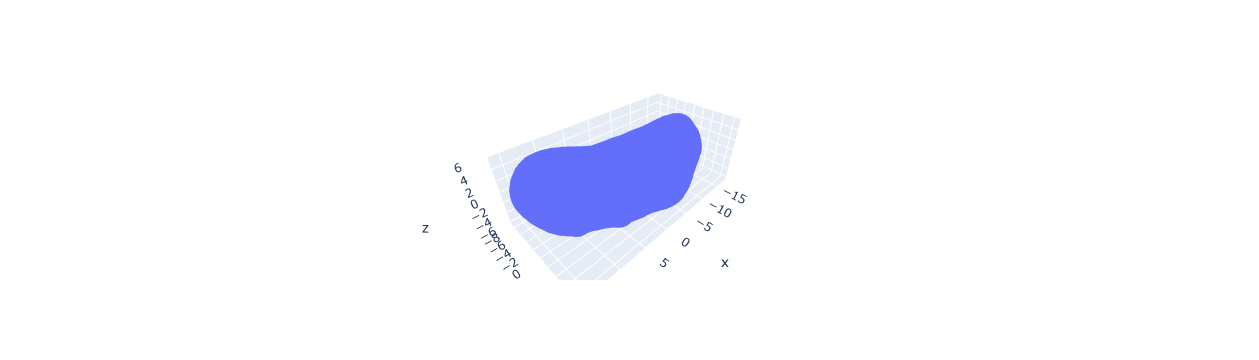

In [26]:
px.scatter_3d(x=rad['x'], y=rad['y'], z=rad['z'])